### **Import Libraries**

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import os 
from matplotlib import font_manager 
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Set Paths**

In [31]:
github_folder = str(Path(os.getcwd()).parent.parent.absolute())
github_folder

'/Users/ppower1/Documents/GitHub'

### **Style**

In [32]:
locations = github_folder + '/evictions/styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"

/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader
/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader/static/Newsreader_60pt/Newsreader_60pt-ExtraLightItalic.ttf


### **Read in Data**

In [33]:
df = pd.read_csv("./../data/CES9091000001.csv")
df1 = pd.read_csv("./../data/PAYEMS.csv")
df = pd.merge(df, df1, how='left', on='observation_date')
df.head()

,observation_date,CES9091000001,PAYEMS
0,1939-01-01,912,29923
1,1939-02-01,925,30100
2,1939-03-01,929,30280
3,1939-04-01,933,30094
4,1939-05-01,941,30299


### **Convert to Date Time**

In [34]:
# Convert observation_date to datetime format if it's not already
df['observation_date'] = pd.to_datetime(df['observation_date'])

In [35]:
df['Rel'] = df['CES9091000001'] / df['PAYEMS'] * 100

### **Plot**

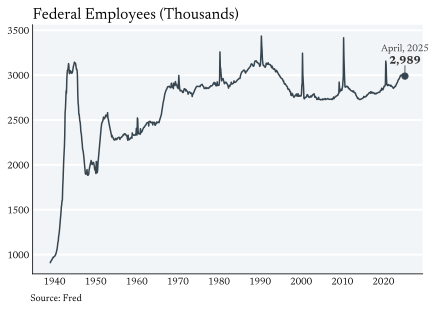

In [36]:
# Create only one set of axes
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)

# Set the facecolor directly on the existing axes
ax.set_facecolor((.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'right', 'top':
    ax.spines[key].set_visible(False)

ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)

plt.plot(df['observation_date'], df['CES9091000001'], color='#36454F')

# Get the last value and date
last_date = df['observation_date'].iloc[-1]
last_value = df['CES9091000001'].iloc[-1]

# Add a dot at the end of the line
ax.scatter(last_date, last_value, color='#36454F', s=40, zorder=5)

# Format the last date to month and year
import pandas as pd
from datetime import datetime
if isinstance(last_date, pd.Timestamp):
    formatted_date = last_date.strftime('%B, %Y')
elif isinstance(last_date, datetime):
    formatted_date = last_date.strftime('%B, %Y')
else:
    formatted_date = str(last_date)  # Default fallback

# Calculate the y-range for positioning the annotations
y_min, y_max = ax.get_ylim()
y_range = y_max - y_min

# Add the date annotation
ax.annotate(formatted_date, 
            xy=(last_date, last_value + 0.10 * y_range),  # Position slightly below the point
            ha='center',
            fontsize=10,
            color='#333333')

# Add the value annotation (format with commas)
ax.annotate(f'{last_value:,.0f}', 
            xy=(last_date, last_value + 0.05 * y_range),  # Position slightly above the point
            ha='center',
            fontsize=11,
            fontweight='bold',
            color='#333333')

# Add the connecting line (similar to your image)
# Calculate the endpoint for the connecting line in a safer way
import matplotlib.dates as mdates

# Get the date range in days
x_min, x_max = ax.get_xlim()
date_range_in_days = (x_max - x_min)
date_offset_in_days = date_range_in_days * 0.02  # small percentage of the date range

# Convert from matplotlib date to datetime
end_date_mpl = mdates.num2date(x_max)
line_end_x = last_date  # Use the same x-coordinate as the data point

# Add the connecting line
ax.annotate('', 
            xy=(last_date, last_value),  # Start at the data point
            xytext=(line_end_x, last_value + 0.05 * y_range),  # End at the label position
            arrowprops=dict(arrowstyle='-', color='#333333', linewidth=0.8))

plt.title('Federal Employees (Thousands)', loc='left', size=16)

ax.text(0.06, -0.1, 'Source: Fred', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
fig.savefig('./../figures/fed_employees.png')
plt.show()

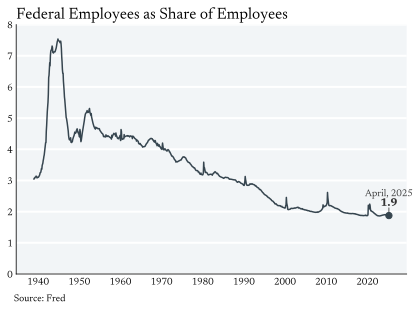

In [39]:
# Create only one set of axes
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)

# Set the facecolor directly on the existing axes
ax.set_facecolor((.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'right', 'top':
    ax.spines[key].set_visible(False)

ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)

plt.plot(df['observation_date'], df['Rel'], color='#36454F')

# Get the last value and date
last_date = df['observation_date'].iloc[-1]
last_value = df['Rel'].iloc[-1]

# Add a dot at the end of the line
ax.scatter(last_date, last_value, color='#36454F', s=40, zorder=5)

# Format the last date to month and year
if isinstance(last_date, pd.Timestamp):
    formatted_date = last_date.strftime('%B, %Y')
elif isinstance(last_date, datetime):
    formatted_date = last_date.strftime('%B, %Y')
else:
    formatted_date = str(last_date)  # Default fallback

# Calculate the y-range for positioning the annotations
y_min, y_max = ax.get_ylim()
y_range = y_max - y_min

# Add the date annotation
ax.annotate(formatted_date, 
            xy=(last_date, last_value + 0.10 * y_range),  # Position slightly below the point
            ha='center',
            fontsize=10,
            color='#333333')

# Add the value annotation (format with commas)
ax.annotate(f'{last_value:,.1f}', 
            xy=(last_date, last_value + 0.05 * y_range),  # Position slightly above the point
            ha='center',
            fontsize=11,
            fontweight='bold',
            color='#333333')

# Add the connecting line (similar to your image)
# Calculate the endpoint for the connecting line in a safer way

# Get the date range in days
x_min, x_max = ax.get_xlim()
date_range_in_days = (x_max - x_min)
date_offset_in_days = date_range_in_days * 0.02  # small percentage of the date range

# Convert from matplotlib date to datetime
end_date_mpl = mdates.num2date(x_max)
line_end_x = last_date  # Use the same x-coordinate as the data point

# Add the connecting line
ax.annotate('', 
            xy=(last_date, last_value),  # Start at the data point
            xytext=(line_end_x, last_value + 0.05 * y_range),  # End at the label position
            arrowprops=dict(arrowstyle='-', color='#333333', linewidth=0.8))

plt.title('Federal Employees as Share of Employees', loc='left', size=16)

ax.text(0.06, -0.1, 'Source: Fred', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_ylim(0, 8)
fig.savefig('./../figures/fed_employees_share.png')
plt.show()